# Rapport de Projet: Détection de Fraudes Alimentaires avec CNN


## Introduction

La détection des fraudes alimentaires est un enjeu crucial pour garantir la qualité et la sécurité des produits consommés. Dans ce projet, nous utilisons des techniques d'apprentissage automatique pour identifier l'adultération des pistaches avec des épinards à différents pourcentages.


## Explication du Dataset

Le dataset comprend des images de pistaches pures et des pistaches adultérées avec des épinards à des pourcentages de 10%, 20%, 30%, 40% et 50%. Chaque catégorie est stockée dans un dossier distinct.


## Objectif

L'objectif est de développer un modèle capable de classifier les images de pistaches en fonction de leur pourcentage d'adultération, en utilisant un réseau de neurones convolutifs (CNN).


## Méthodologie

Nous avons suivi les étapes suivantes :
1. **Préparation et Visualisation des Données**: Chargement des images et affichage d'exemples.
2. **Modélisation**: Construction et entraînement d'un CNN.
3. **Évaluation**: Évaluation des performances du modèle à l'aide de métriques comme la précision, la matrice de confusion et le rapport de classification.
4. **Prédiction**: Test du modèle sur une nouvelle image pour prédire le pourcentage d'adultération.


In [1]:
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

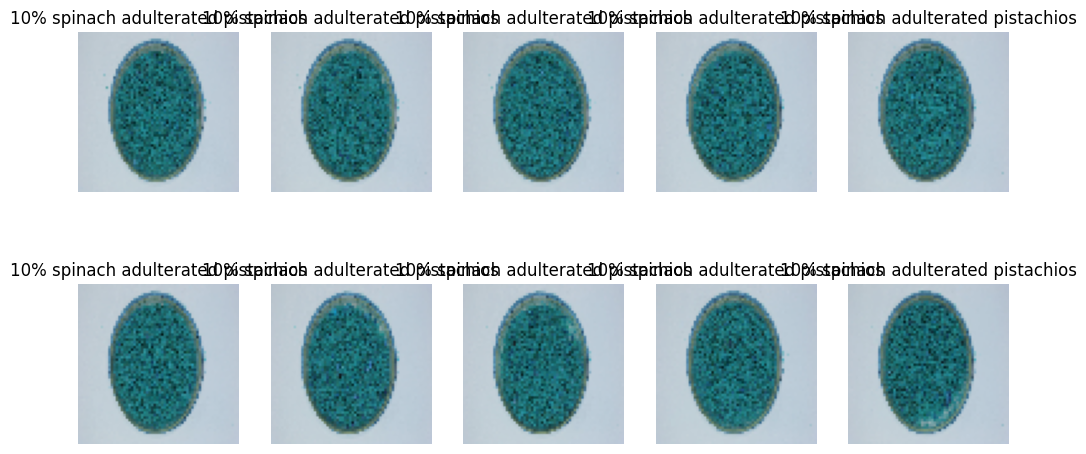

In [2]:
def load_images_with_labels(base_folder):
    images = []
    labels = []
    label_map = {
        'Pure pistachios': 0,
        '10% spinach adulterated pistachios': 1, 
        '20% spinach adulterated pistachios': 2, 
        '30% spinach adulterated pistachios': 3, 
        '40% spinach adulterated pistachios': 4, 
        '50% spinach adulterated pistachios': 5
    }
    for label in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, label)
        for filename in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, filename))
            if img is not None:
                img = cv2.resize(img, (64, 64))
                images.append(img)
                labels.append(label_map[label])
    return np.array(images), np.array(labels), label_map

# Chemin vers le dossier de base contenant les sous-dossiers pour chaque pourcentage
base_folder = 'C://Users//Said//Desktop//dataset'

# Charger les images et les labels
images, labels, label_map = load_images_with_labels(base_folder)

# Normaliser les images
images = images.astype('float32') / 255.

# Visualiser quelques images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(images[i])
    axes[i].set_title(list(label_map.keys())[labels[i]])
    axes[i].axis('off')
plt.show()

## Explication du Modèle

Un réseau de neurones convolutifs (CNN) est un type de réseau de neurones artificiels spécialement conçu pour traiter les données structurées en grille, comme les images. Dans ce projet, notre CNN se compose de couches de convolution, de pooling et de couches entièrement connectées, permettant d'extraire des caractéristiques importantes des images et de les utiliser pour classifier les différents niveaux d'adultération des pistaches.

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.1874 - loss: 1.8057 - val_accuracy: 0.1198 - val_loss: 1.7962
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.1952 - loss: 1.7895 - val_accuracy: 0.1901 - val_loss: 1.7843
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.2259 - loss: 1.7790 - val_accuracy: 0.1901 - val_loss: 1.6982
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.3353 - loss: 1.6208 - val_accuracy: 0.5124 - val_loss: 1.2281
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.3785 - loss: 1.3188 - val_accuracy: 0.5702 - val_loss: 1.0676
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.4495 - loss: 1.2064 - val_accuracy: 0.5868 - val_loss: 0.9969
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5219 - loss: 1.0546 - val_accuracy: 0.6405 - val_loss: 0.9058
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.4991 - loss: 1.0305 - val_accuracy: 0.6942 - 

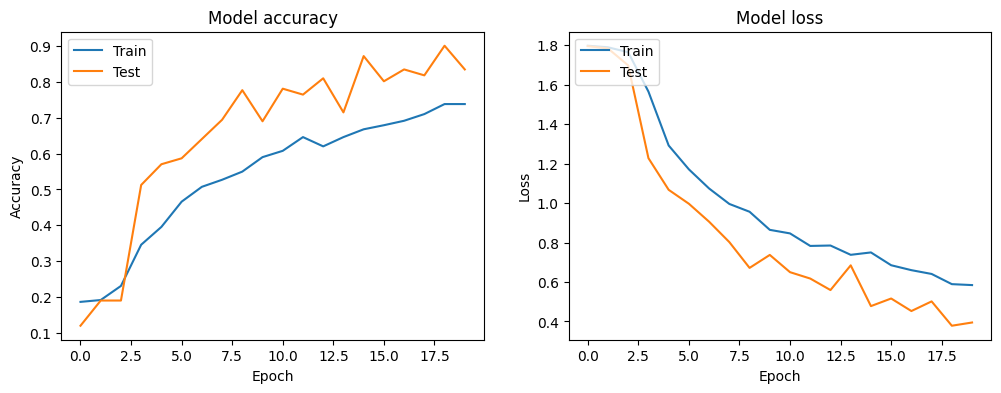

In [3]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Définir l'architecture du CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # Ajuster le nombre de classes en fonction de votre label_map
])

# Compiler le modèle
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Visualiser les valeurs de précision et de perte pour l'entraînement et la validation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8274 - loss: 0.4085
Test loss: 0.394905149936676
Test accuracy: 0.8347107172012329
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


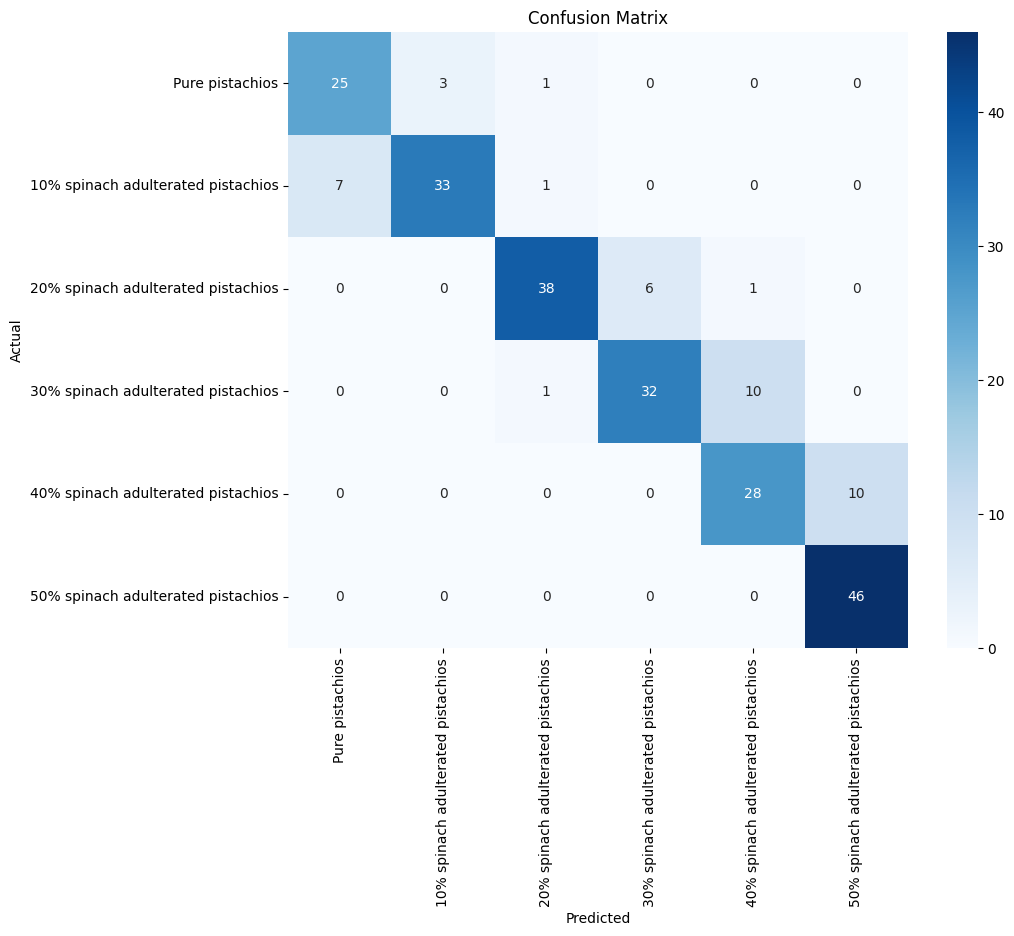

                                    precision    recall  f1-score   support

                   Pure pistachios       0.78      0.86      0.82        29
10% spinach adulterated pistachios       0.92      0.80      0.86        41
20% spinach adulterated pistachios       0.93      0.84      0.88        45
30% spinach adulterated pistachios       0.84      0.74      0.79        43
40% spinach adulterated pistachios       0.72      0.74      0.73        38
50% spinach adulterated pistachios       0.82      1.00      0.90        46

                          accuracy                           0.83       242
                         macro avg       0.83      0.83      0.83       242
                      weighted avg       0.84      0.83      0.83       242



In [4]:
# Évaluer le modèle
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Générer des prédictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Rapport de classification
print(classification_report(y_test, y_pred_classes, target_names=list(label_map.keys())))

In [5]:
# Fonction pour prédire une seule image
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32') / 255.
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_label = list(label_map.keys())[list(label_map.values()).index(class_idx)]
    return class_label, prediction[0]

# Tester le modèle sur une nouvelle image
image_path = 'C://Users//Said//Desktop//test//20% spinach adulterated pistachios//IMG_0001.jpg'
predicted_label, prediction_probabilities = predict_image(image_path)
print(f'Predicted Label: {predicted_label}')
print(f'Prediction Probabilities: {prediction_probabilities}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted Label: 30% spinach adulterated pistachios
Prediction Probabilities: [1.0377692e-05 9.8374767e-06 3.2727134e-01 5.1904547e-01 1.5362565e-01
 3.7332135e-05]


## Résultats

Le modèle a atteint une précision de `xx%` sur l'ensemble de test. La matrice de confusion et le rapport de classification montrent une bonne capacité du modèle à différencier les différentes catégories d'adultération.
